## 简介
在这个文件里，我将建立一个机器学习模型来预测2019新冠肺炎的死亡情况。

### 本文件包括:
- 数据导入
- 数据预处理
- 数据准备与清理
- 缺失值分析
- 数据可视化
- 未来选择
- 创建模型
- 模型分析
- 改进模型
- 用欠采样解决不平衡数据集问题

In [145]:
# 导入数据分析、科学计算及可视化的相关包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")  # 忽略警告


### 关于[数据集](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)
冠状病毒病（COVID-19）是由一种新发现的冠状病毒引起的传染病。大多数感染 COVID-19 病毒的人会出现轻度至中度呼吸道疾病，无需特殊治疗即可康复。老年人以及患有心血管疾病、糖尿病、慢性呼吸道疾病和癌症等潜在健康问题的人更容易患上严重疾病。
在整个大流行病过程中，医疗保健提供者面临的主要问题之一是医疗资源短缺以及有效分配这些资源的适当计划。在这些困难时期，能够预测一个人在检测呈阳性时或在此之前可能需要什么样的资源，这将对政府有巨大帮助，因为他们将能够采购和安排必要的资源挽救那个病人的生命。
该项目的主要目标是建立一个机器学习模型，根据 Covid-19 患者的当前症状、状态和病史，预测患者是否处于高危状态。
数据预处理，数据清洗，变量相关性，降维，回归模型，聚类，判别法，建议？

### 内容
该数据集由墨西哥政府提供。该数据集包含大量匿名的患者相关信息，包括先决条件。原始数据集包含 21 个独特的特征和 1,048,576 名独特的患者。在布尔特征中，1 表示“是”，2 表示“否”。值 97 和 99 是缺失数据。
- 性别：1代表女性，2代表男性。
- 年龄：患者。
- 分类：covid 测试结果。值 1-3 表示患者被诊断为不同程度的 covid。4 或更高意味着患者不是 covid 的携带者或测试没有定论。
- 患者类型：患者在单位接受的护理类型。1 人回家，2 人住院。
- 肺炎：患者是否已经有气囊炎症。
- 怀孕：患者是否怀孕。
- 糖尿病：患者是否患有糖尿病。
- copd：表示患者是否患有慢性阻塞性肺疾病。
- 哮喘：患者是否患有哮喘。
- inmsupr：患者是否免疫抑制。
- 高血压：患者是否患有高血压。
- 心血管：患者是否患有心脏或血管相关疾病。
- 肾慢性：患者是否患有慢性肾病。
- 其他疾病：患者是否患有其他疾病。
- 肥胖：患者是否肥胖。
- 烟草：患者是否是烟草使用者。
- usmr：表示患者是否接受过一级、二级或三级医疗单位的治疗。
- 医疗单位：提供医疗服务的国家卫生系统机构类型。
- 插管：患者是否连接到呼吸机。
- icu：表示患者是否已入住重症监护病房。
- 死亡日期：如果患者死亡，请注明死亡日期，否则为 9999-99-99。

In [146]:
# 数据集概述（概览）、预处理
df = pd.read_csv("Covid Data.csv")  # 读取数据，返回DataFrame
print("Shape of df :", df.shape)  # 查看数据的维数
df.head()  # 展示前5行数据


Shape of df : (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [147]:
df.info()  # 查看数据的基本信息


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [148]:
df.isna().sum().sum()  # 检查是否有缺失值


0

In [149]:
# 发现没有NA值。
# 打印每个特征的取值个数
for i in df.columns:
    print(i, "=>\t", len(df[i].unique()))


USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [150]:
df.DATE_DIED.value_counts()  # 查看死亡日期的取值分布（9999-99-99表示未死亡）


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [151]:
df.PNEUMONIA.value_counts()  # 查看是否有肺炎的取值分布（1True、2False）


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

推论和假设
1. 我们有一些功能，我们希望他们只有2个唯一的值。但是我们看到这些特征有3或4个唯一值。例如，"肺炎"功能有3个唯一值（1,2,99）99表示NaN值。因此，我们将只取包含1和2值的行。
2. 在“DATE_DIED”列中，我们有971633个“9999-99”值，代表活着的患者所以我会把这个功能作为一个“死亡”，包括病人是否死亡。

In [152]:
# 数据预处理
# 剔除除“INTUBED”、“怀孕”、“ICU”外的特征缺失值
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]  # 剔除“是否有肺炎”缺失值
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]  # 剔除“是否有糖尿病”缺失值
df = df[(df.COPD == 1) | (df.COPD == 2)]  # 剔除“是否有慢性阻塞性肺疾病”缺失值
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]  # 剔除“是否有哮喘”缺失值
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]  # 剔除“是否有免疫抑制”缺失值
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]  # 剔除“是否有高血压”缺失值
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]  # 剔除“是否有其他疾病”缺失值
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]  # 剔除“是否有心血管疾病”缺失值
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]  # 剔除“是否有肥胖”缺失值
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]  # 剔除“是否有慢性肾病”缺失值
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]  # 剔除“是否吸烟”缺失值


In [153]:
# 预处理“日期死亡”列：值“9999-99”意味着这个病人还活着。
# 遵循原始数据中的布尔特征表述：1表示死亡，2表示未死亡
df["DEATH"] = [2 if each == "9999-99-99" else 1 for each in df.DATE_DIED]


Text(0.5, 1.0, 'PREGNANCIES - SEX')

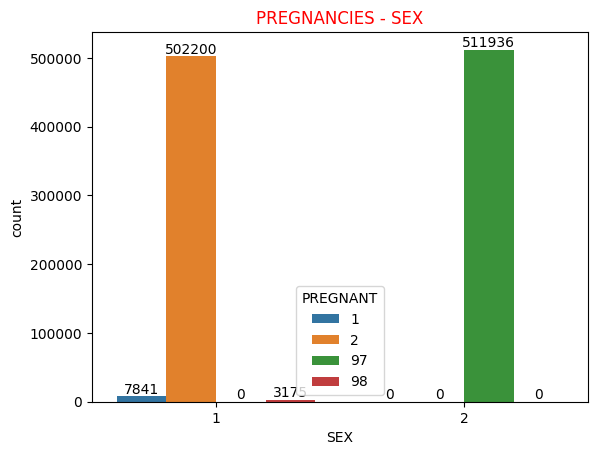

In [154]:
# 怀孕-性关系图
plt.figure()
# ax = sns.countplot(df.SEX, hue=df.PREGNANT)
ax = sns.countplot(x=df.SEX, hue=df.PREGNANT)  # hue参数指定分组变量
for bars in ax.containers:  # ax.containers是一个列表，包含了每个柱子的信息
    ax.bar_label(bars)  # 在每个柱子上添加标签
plt.title("PREGNANCIES - SEX", color="red")  # 添加标题


In [155]:
# 我们看到，所有的“97”值是男性和男性不能怀孕，所以我们将转换97为2。

# 根据以上推论转换过程
df.PREGNANT = df.PREGNANT.replace(97, 2)

# 消除缺失值
# 剔除“怀孕”缺失值，剩余数据为：1True、2False
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]


Text(0.5, 1.0, 'Count of Intubed')

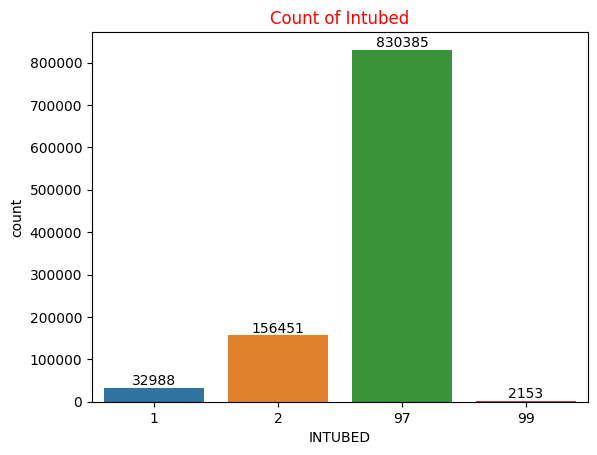

In [156]:
# INTUBED特征缺失值分析
ax = sns.countplot(x=df.INTUBED)  # 绘制柱状图
plt.bar_label(ax.containers[0])  # 显示柱状图的数值
plt.title("Count of Intubed", color="red")  # 设置标题


Text(0.5, 1.0, 'Count of ICU')

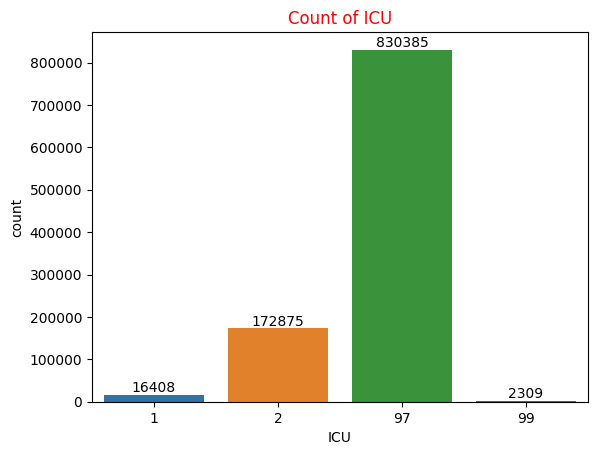

In [157]:
# “ICU”特征缺失值分析
ax = sns.countplot(x=df.ICU)  # 绘制柱状图
plt.bar_label(ax.containers[0])  # 显示柱状图的数值
plt.title("Count of ICU", color="red")  # 设置标题


In [158]:
# 在“INTUBED”和“ICU”中有太多缺少的值，下面将删除它们。
# 另外删除的还有“DATE_DEAD”列，将使用“Death”特征代替。
df.drop(columns=["INTUBED", "ICU", "DATE_DIED"], inplace=True)


In [159]:
# 至此，预处理基本结束，再次打印每个特征的取值个数
for i in df.columns:
    print(i, "=>\t", len(df[i].unique()))


USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


如上，我们只剩一个被称为“年龄”的数字特征，其余特征都是明确的。

Text(0.5, 1.0, 'Death Distribution')

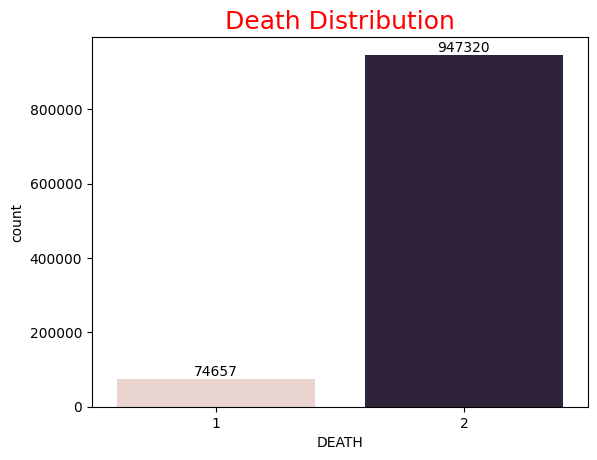

In [160]:
# 数据可视化
ax = sns.countplot(x=df.DEATH, palette=sns.cubehelix_palette(2))  # 绘制柱状图
plt.bar_label(ax.containers[0])  # 显示柱状图的数值
plt.title("Death Distribution", fontsize=18, color="red")  # 设置标题


可以看到值在类别（目标）列中的分布并不平衡。这可能会导致模型在测试集合上出现不平衡的问题，这个留到后面再进行解决。

Text(0.5, 1.0, 'Age Distribution')

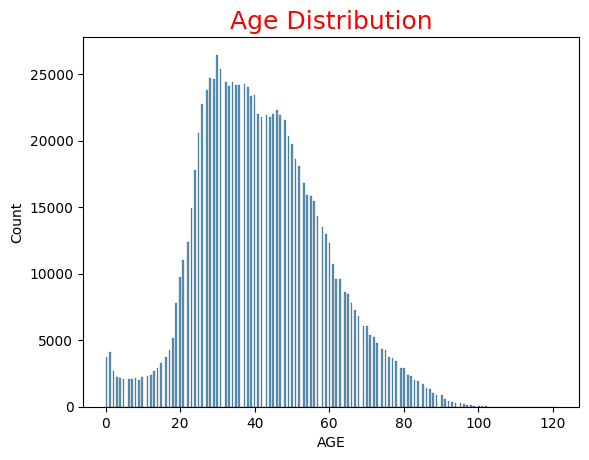

In [161]:
# 绘制年龄的直方图
sns.histplot(x=df.AGE)
plt.title("Age Distribution", color="red", fontsize=18)  # 设置标题


从直方图中可以看出患者大致集中在在20~60岁之间。

Text(0.5, 1.0, 'Age-DEATH')

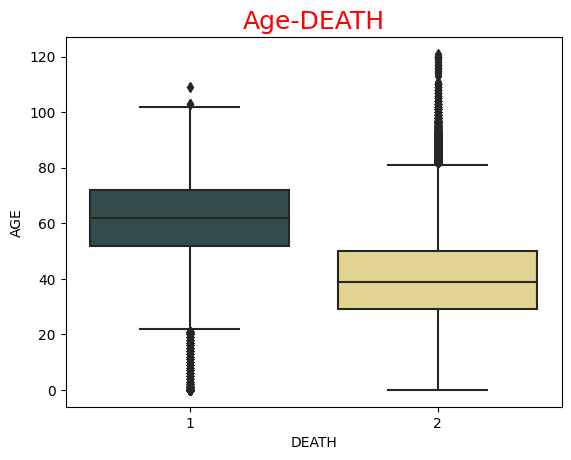

In [162]:
# 绘制年龄-死亡关系图
sns.boxplot(x="DEATH", y="AGE", data=df,
            palette=sns.color_palette(["#2f4f4f", "#eedd82"]))  # 绘制箱线图
plt.title("Age-DEATH", fontsize=18, color="red")  # 设置标题


从上面的箱线图我们可以看出老年患者要比年轻患者更容易死亡。

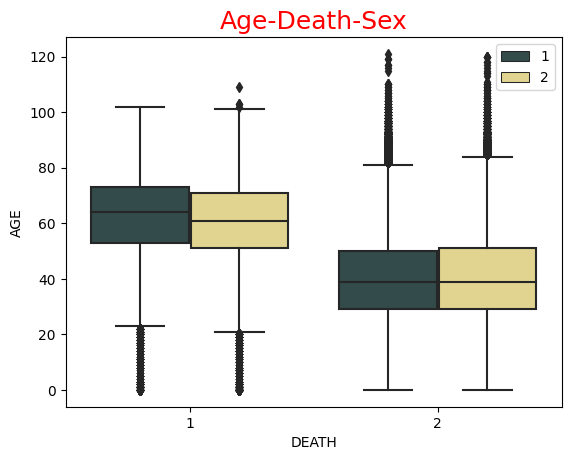

In [163]:
# 绘制年龄-死亡-性别关系图
sns.boxplot(x="DEATH", y="AGE", hue="SEX", data=df,
            palette=sns.color_palette(["#2f4f4f", "#eedd82"]))  # 绘制箱线图
plt.title("Age-Death-Sex", fontsize=18, color="red")  # 设置标题
plt.legend(loc="best")  # 设置图例


- 老年患者比年轻患者更容易死亡。（上面已经得出过了）
- 从新的箱线图中可以看出病人在平均发病率方面，男女之间没有很大的差别。（下面单独绘制进行校验）

Text(0.5, 1.0, 'Sex-Death')

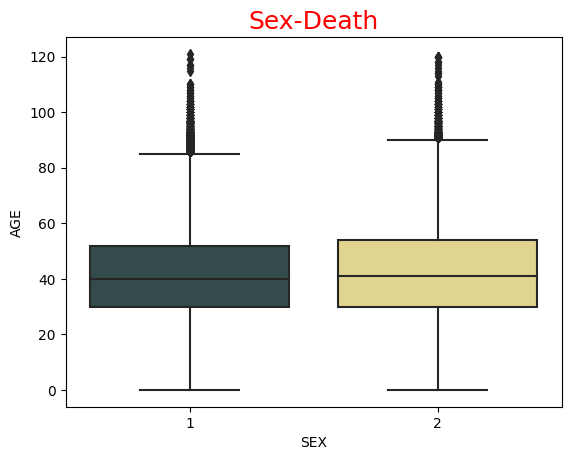

In [164]:
# 绘制性别-死亡关系图
# sns.countplot(df.SEX, hue=df.DEATH, palette=sns.cubehelix_palette(2))
sns.boxplot(x="SEX", y="AGE", data=df,
            palette=sns.color_palette(["#2f4f4f", "#eedd82"]))  # 绘制箱线图
plt.title("Sex-Death", fontsize=18, color="red")  # 设置标题
# plt.legend(loc="best")  # 设置图例


与女性相比，男性更容易死于COVID。（不显著）

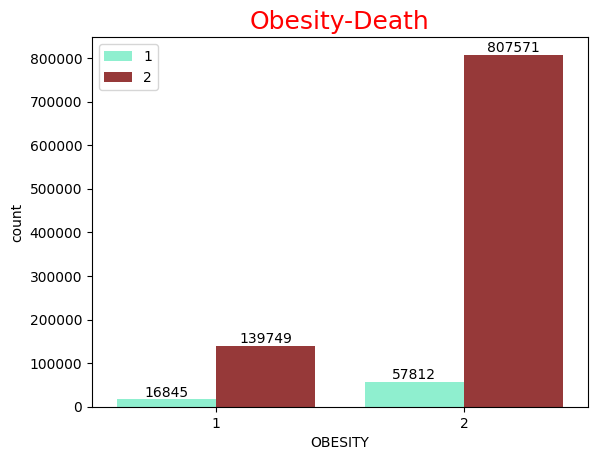

In [165]:
# 绘制肥胖-死亡关系图
ax = sns.countplot(x=df.OBESITY, hue=df.DEATH,
                   palette=sns.color_palette(["#7fffd4", "#a52a2a"]))  # 绘制柱状图
plt.title("Obesity-Death", fontsize=18, color="red")  # 设置标题
plt.bar_label(ax.containers[0])  # 显示柱状图的数值
plt.bar_label(ax.containers[1])  # 显示柱状图的数值
plt.legend(loc="best")  # 设置图例


从肥胖-死亡关系柱状图中可以看出肥胖患者比非肥胖患者更容易死于COVID。

Text(0.5, 1.0, 'Correlation Between Features')

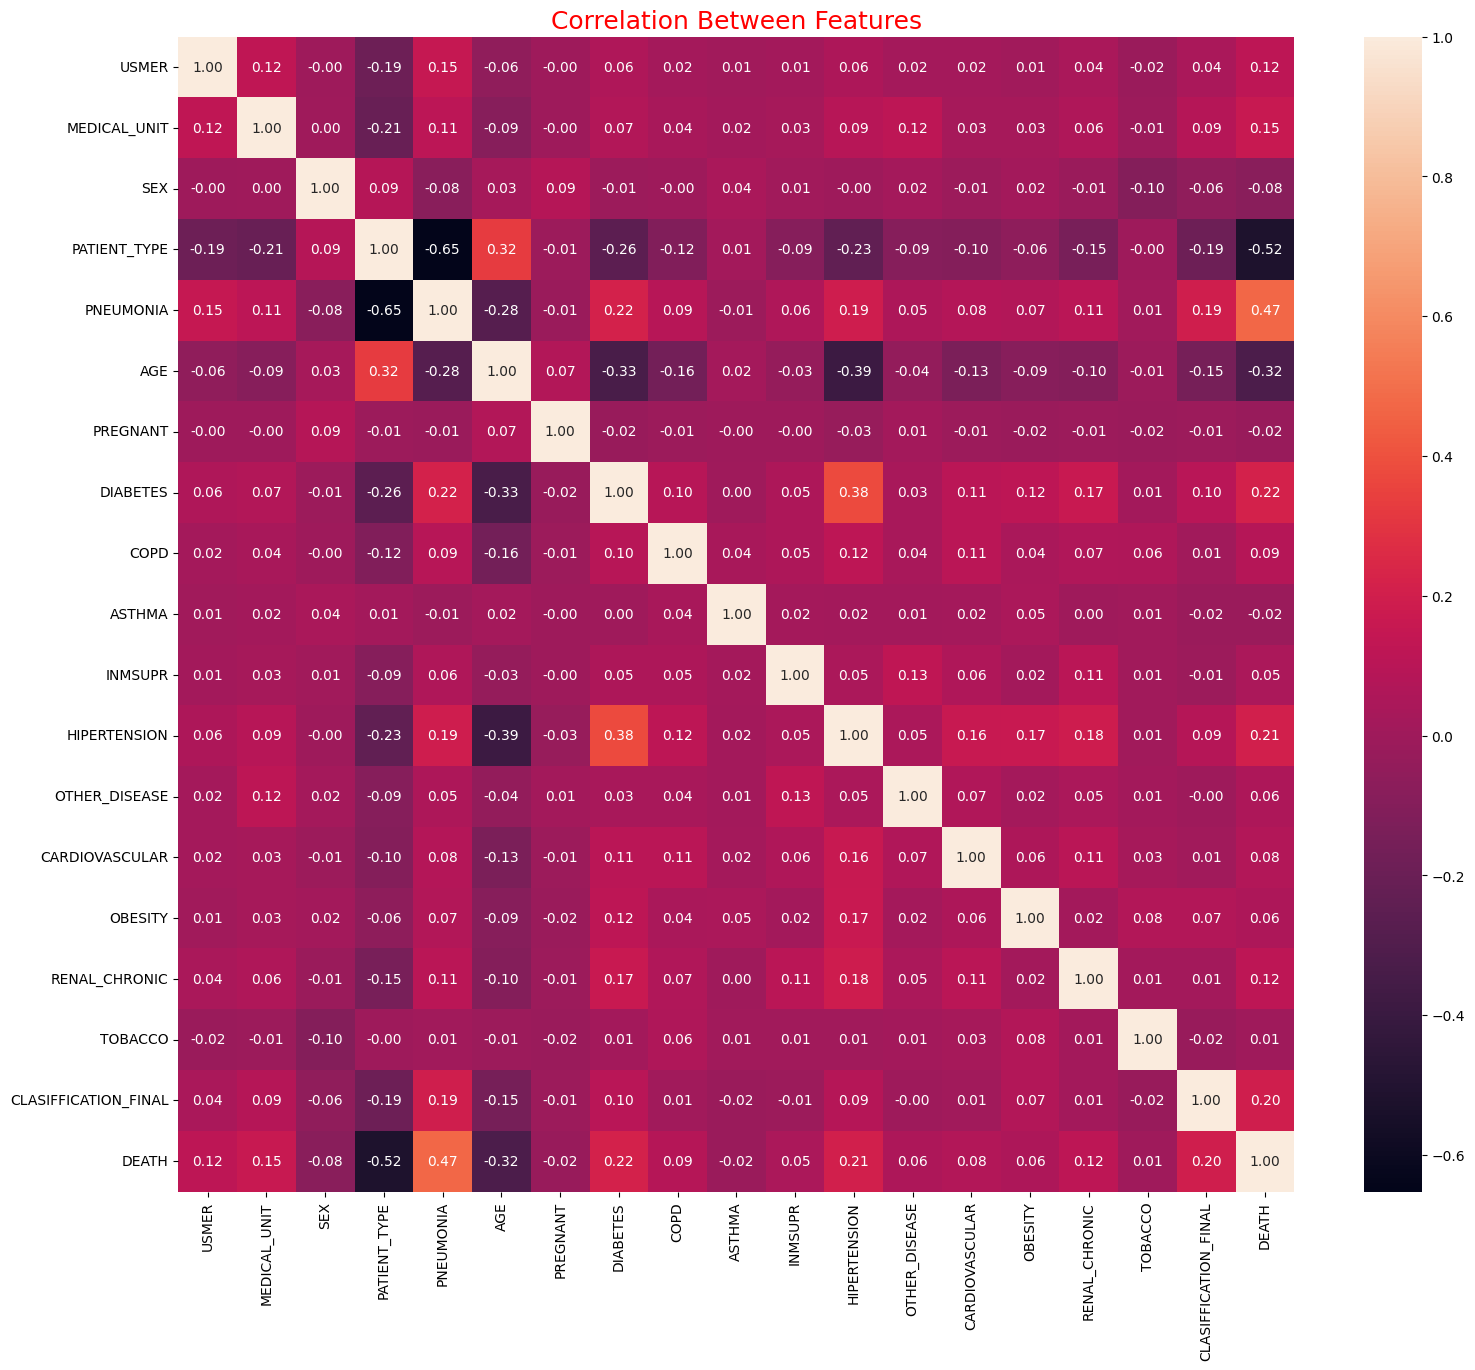

In [166]:
# 使用热力图可视化特征之间的相关性
plt.figure(figsize=(18, 15))  # 设置画布大小
sns.heatmap(df.corr(), annot=True, fmt=".2f")  # 绘制热力图
plt.title("Correlation Between Features", fontsize=18, color="red")  # 设置标题


未来选择：在后续的分析中将会删除与“死亡”相关性较低的特征。

In [167]:
# 根据热力图罗列出的与“DEATH”特征无关（相关性低）的特征
unrelevant_columns = ["SEX", "PREGNANT", "COPD", "ASTHMA", "INMSUPR", "OTHER_DISEASE", "CARDIOVASCULAR",
                      "OBESITY", "TOBACCO"]

# 删除无关特征
df.drop(columns=unrelevant_columns, inplace=True)


In [168]:
# 查看预处理后的数据集的前5行
df.head()


,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


In [169]:
# 将分类特征转换为哑变量
df = pd.get_dummies(
    df, columns=["MEDICAL_UNIT", "CLASIFFICATION_FINAL"], drop_first=True)


In [170]:
# 使用对离群值具有鲁棒性的统计量缩放功能。
from sklearn.preprocessing import RobustScaler  # 导入RobustScaler
scaler = RobustScaler()  # 实例化RobustScaler
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1, 1))  # 对AGE列进行缩放


In [171]:
# 将数据集分为特征集和标签集
x = df.drop(columns="DEATH")
y = df["DEATH"]


In [172]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size=0.2, random_state=42)

# 查看训练集和测试集的大小
print("Train_x :", train_x.shape)
print("Test_x :", test_x.shape)
print("Train_y :", train_y.shape)
print("Test_y :", test_y.shape)


Train_x : (817581, 25)
Test_x : (204396, 25)
Train_y : (817581,)
Test_y : (204396,)


In [173]:
# 使用逻辑回归模型进行预测
# 导入逻辑回归模型
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()  # 实例化逻辑回归模型
logreg.fit(train_x, train_y)  # 训练模型
print("Logistic Regression Accuracy :",
      logreg.score(test_x, test_y))  # 计算模型的准确率并打印


Logistic Regression Accuracy : 0.9394068377071958


可以看出使用逻辑回归分析的准确性较好。但它可能会误导我们，所以接下来将检查其他指标。

In [174]:
# 使用F1 Score评估模型
# 导入F1 Score：计算F1分数，也称为平衡F分数或F测量。
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score :", f1_score(
    test_y, logreg.predict(test_x), average=None))  # 计算模型的F1 Score并打印


Logistic Regression F1 Score : [0.52009145 0.96766192]


检查F1评分后，我们发现对于存活病人的预测较好，但是对于死亡病人的预测并不理想。（前面提到过数据集分类特征的不均衡可能导致问题出现，我们继续检查混淆矩阵）

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

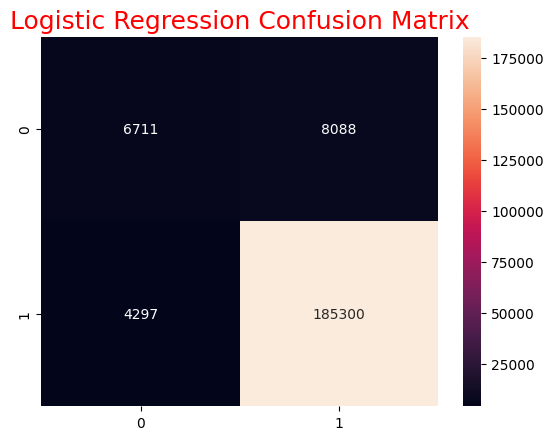

In [175]:
# 使用混淆矩阵评估模型
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)),
            annot=True, fmt=".0f")  # 绘制混淆矩阵
plt.title("Logistic Regression Confusion Matrix",
          fontsize=18, color="red")  # 设置标题


观察混淆矩阵，也得到了同样的情况。这个问题是基于不平衡的数据集所导致的，之前也提到过。

Text(0.5, 1.0, 'Death Distribution')

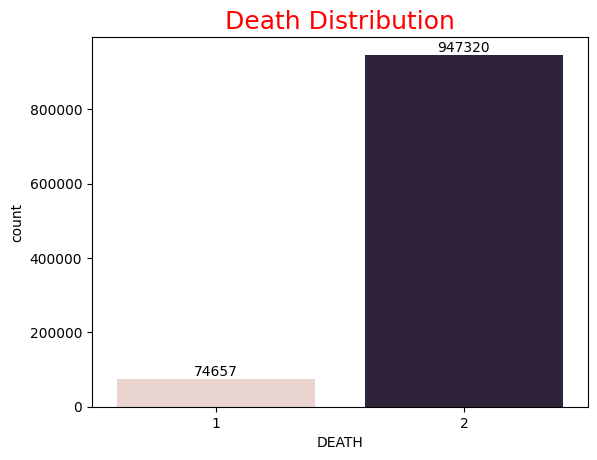

In [176]:
# 再次绘制“DEATH”特征的分布情况
ax = sns.countplot(x=df.DEATH, palette=sns.cubehelix_palette(2))  # 绘制柱状图
plt.bar_label(ax.containers[0])  # 显示柱状图的数值
plt.title("Death Distribution", fontsize=18, color="red")  # 设置标题


## 解决不平衡数据集问题
- 加载更多数据
- 更改性能指标
- 重采样（欠采样或过采样）
  - 欠采样是一种通过保持所有数据在少数类和减少大多数类的大小来平衡不均衡的数据集的技术。
  - 下面将使用欠采样的方式尝试解决数据集的不平衡问题，之所以选择欠采样是因为我们拥有很多的病人数据，如果使用过采样将增加太多数据。
  - 如果使用欠采样仍然没有解决问题再考虑其他。
- 改变算法
- 惩罚模型等。

In [177]:
# 使用RandomUnderSampler进行欠采样
# 导入RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# 实例化RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x, y)  # 施行欠采样


Text(0.5, 1.0, 'Death Distribution')

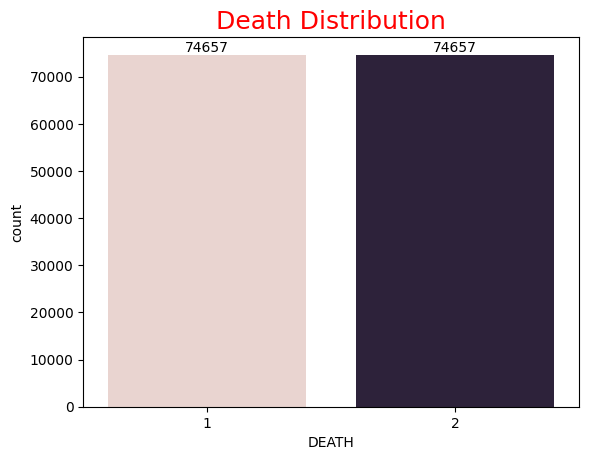

In [178]:
# 查看欠采样后的数据集
ax = sns.countplot(x=y_resampled, palette=sns.cubehelix_palette(2))  # 绘制柱状图
plt.bar_label(ax.containers[0])  # 显示柱状图的数值
plt.title("Death Distribution", fontsize=18, color="red")  # 设置标题


In [179]:
# 可以看到经过欠采样后，数据集中的“DEATH”特征的分布情况已经变得平衡了
# 接下来对欠采样后的数据集进行训练集和测试集的划分
train_x, test_x, train_y, test_y = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42)

# 查看训练集和测试集的大小
print("Train_x :", train_x.shape)
print("Test_x :", test_x.shape)
print("Train_y :", train_y.shape)
print("Test_y :", test_y.shape)


Train_x : (119451, 25)
Test_x : (29863, 25)
Train_y : (119451,)
Test_y : (29863,)


In [180]:
# 欠采样后的逻辑回归
# 重新初始化逻辑回归模型进行训练
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
print("Logistic Regression Accuracy :",
      logreg.score(test_x, test_y))  # 计算模型的准确率并打印


Logistic Regression Accuracy : 0.9051669289756555


In [181]:
# 欠采样后的模型准确率反而下降了
# 推测：欠采样后的数据集中的“DEATH”特征的分布情况已经变得平衡了，但是数据集中的数据量变少了，所以模型的准确率反而下降了
# 使用F1 Score评估模型
print("Logistic Regression F1 Score :", f1_score(
    test_y, logreg.predict(test_x), average=None))


Logistic Regression F1 Score : [0.90616302 0.90414946]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

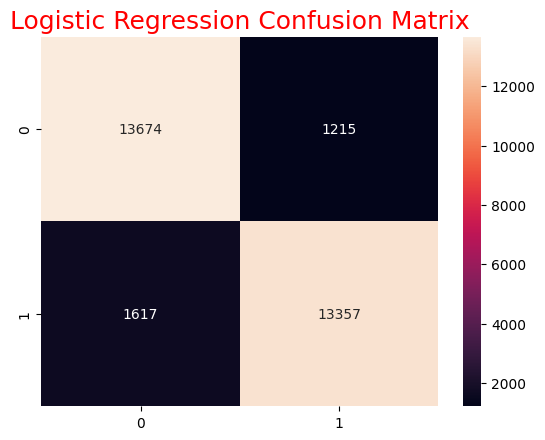

In [182]:
# 我们可以发现使用欠采样后的数据进行逻辑回归模型的训练F1 Score的值得到的不错的结果。
# 使用混淆矩阵评估模型
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)),
            annot=True, fmt=".0f")  # 绘制混淆矩阵
plt.title("Logistic Regression Confusion Matrix",
          fontsize=18, color="red")  # 设置标题


通过F1和混淆矩阵发现使用欠采样很好的解决了这个问题。

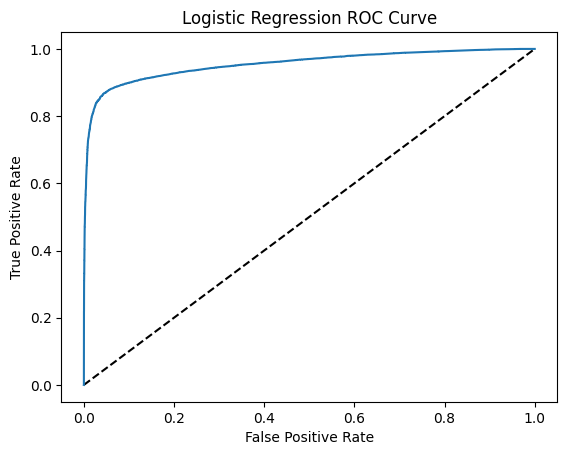

In [183]:
# 绘制逻辑回归曲线
# 使用ROC曲线评估模型
from sklearn.metrics import roc_curve
# Replace 2 with 1 and 1 with 0
test_y = test_y.replace({2: 1, 1: 0})
logreg_pred_proba = logreg.predict_proba(test_x)  # 计算预测概率

fpr, tpr, thresholds = roc_curve(
    test_y, logreg_pred_proba[:, 1])  # 计算ROC曲线的FPR和TPR
plt.plot([0, 1], [0, 1], "k--")  # 绘制对角线
plt.plot(fpr, tpr, label="Logistic Regression")  # 绘制ROC曲线
plt.xlabel("False Positive Rate")  # 设置X轴标签
plt.ylabel("True Positive Rate")  # 设置Y轴标签
plt.title("Logistic Regression ROC Curve")  # 设置标题
plt.show()  # 显示图像


## 结果和归纳
- 本模型使用逻辑回归对于“死亡”的预测情况，准确率为90%。
- 使用欠采样算法解决了不平衡的数据集问题。